## **Librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.covariance import MinCovDet
from scipy.stats import chi2

In [2]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.utils import shuffle

In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm # Estadísticas R Adjused
import seaborn as sns  # Gráficos
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
from factor_analyzer.factor_analyzer import calculate_kmo
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [5]:
def calcular_imeca(datos):
  datos["O3_PPM"]=datos["O3"].apply(lambda x: x/1000)
  datos["NO2_PPM"]=datos["NO2"].apply(lambda x: x/1000)
  datos["SO2_PPM"]=datos["SO2"].apply(lambda x: x/1000)
  datos["CO_IMECA"]=''
  datos["SO2_IMECA"]=''
  datos["NO2_IMECA"]=''
  datos["O3_IMECA"]=''
  datos["PM2.5_IMECA"]=''
  datos["PM10_IMECA"]=''

  for i in datos.index:
     datos.loc[i,"CO_IMECA"]=datos.loc[i,"CO"]*100/11
     datos.loc[i,"SO2_IMECA"]=datos.loc[i,"SO2_PPM"]*100/0.11
     datos.loc[i,"NO2_IMECA"]=datos.loc[i,"NO2_PPM"]*100/0.21
     if datos.loc[i,"O3_PPM"]>=0 and datos.loc[i,"O3_PPM"]<=0.070:
      datos.loc[i,"O3_IMECA"]=714.29*datos.loc[i,"O3_PPM"]

     if datos.loc[i,"O3_PPM"]>=0.071 and datos.loc[i,"O3_PPM"]<=0.095:
      datos.loc[i,"O3_IMECA"]=2041.67*(datos.loc[i,"O3_PPM"] - 0.071)+51

     if datos.loc[i,"O3_PPM"]>=0.096 and datos.loc[i,"O3_PPM"]<=0.154:
      datos.loc[i,"O3_IMECA"]=844.83*(datos.loc[i,"O3_PPM"] - 0.096) +101

     if datos.loc[i,"O3_PPM"]>=0.155 and datos.loc[i,"O3_PPM"]<=0.204:
      datos.loc[i,"O3_IMECA"]=1000*(datos.loc[i,"O3_PPM"] - 0.155) + 151

     if datos.loc[i,"O3_PPM"]>=0.205 and datos.loc[i,"O3_PPM"]<=0.404:
      datos.loc[i,"O3_IMECA"]= 497.49*(datos.loc[i,"O3_PPM"]-0.205) + 201

     if datos.loc[i,"O3_PPM"]>=0.405 and datos.loc[i,"O3_PPM"]<=0.504:
      datos.loc[i,"O3_IMECA"]=1000*(datos.loc[i,"O3_PPM"]-104)

     if datos.loc[i,"O3_PPM"]>=0.505 and datos.loc[i,"O3_PPM"]<=0.604:
      datos.loc[i,"O3_IMECA"]=1000*(datos.loc[i,"O3_PPM"]-104)

      #PM2.5
     if datos.loc[i,"PM2.5"]>=0 and datos.loc[i,"PM2.5"]<=12:
      datos.loc[i,"PM2.5_IMECA"]=4.17*datos.loc[i,"PM2.5"]

     if datos.loc[i,"PM2.5"]>=12.1 and datos.loc[i,"PM2.5"]<=45:
      datos.loc[i,"PM2.5_IMECA"]=1.49*(datos.loc[i,"PM2.5"] - 12.1) + 51

     if datos.loc[i,"PM2.5"]>=45.1 and datos.loc[i,"PM2.5"]<=97.4:
      datos.loc[i,"PM2.5_IMECA"]=0.94*(datos.loc[i,"PM2.5"] - 45.1) +101

     if datos.loc[i,"PM2.5"]>=97.5 and datos.loc[i,"PM2.5"]<=150.4:
      datos.loc[i,"PM2.5_IMECA"]=0.93*(datos.loc[i,"PM2.5"] - 97.5) + 151

     if datos.loc[i,"PM2.5"]>=150.5 and datos.loc[i,"PM2.5"]<=250.4:
      datos.loc[i,"PM2.5_IMECA"]=0.99*(datos.loc[i,"PM2.5"] - 150.5) + 201

     if datos.loc[i,"PM2.5"]>=250.5 and datos.loc[i,"PM2.5"]<=350.4:
      datos.loc[i,"PM2.5_IMECA"]=0.99*(datos.loc[i,"PM2.5"] - 250.5) + 301

     if datos.loc[i,"PM2.5"]>=350.5 and datos.loc[i,"PM2.5"]<=500.4:
      datos.loc[i,"PM2.5_IMECA"]=0.66*(datos.loc[i,"PM2.5"]-350.5)+ 401


    #PM10

     if datos.loc[i,"PM10"]>=0 and datos.loc[i,"PM10"]<=40:
      datos.loc[i,"PM10_IMECA"]=1.25*datos.loc[i,"PM10"]

     if datos.loc[i,"PM10"]>=41 and datos.loc[i,"PM10"]<=75:
      datos.loc[i,"PM10_IMECA"]=1.44*(datos.loc[i,"PM10"] - 41) + 51

     if datos.loc[i,"PM10"]>=76 and datos.loc[i,"PM10"]<=214:
      datos.loc[i,"PM10_IMECA"]=0.355*(datos.loc[i,"PM10"] - 76) +101

     if datos.loc[i,"PM10"]>=215 and datos.loc[i,"PM10"]<=354:
      datos.loc[i,"PM10_IMECA"]=0.353*(datos.loc[i,"PM10"] - 215) + 151

     if datos.loc[i,"PM10"]>=355 and datos.loc[i,"PM10"]<=424:
      datos.loc[i,"PM10_IMECA"]=(datos.loc[i,"PM10"]-355)*1.435 + 201

     if datos.loc[i,"PM10"]>=425 and datos.loc[i,"PM10"]<=504:
      datos.loc[i,"PM10_IMECA"]=(datos.loc[i,"PM10"]-425)*1.253 + 301

     if datos.loc[i,"PM10"]>=505 and datos.loc[i,"PM10"]<=604:
      datos.loc[i,"PM10_IMECA"]=datos.loc[i,"PM10"]-104

  return datos

In [6]:
def class_imeca(datos_imeca):
  # Índice Imeca
  Imeca = []
  sum = 0
  for i in range(len(datos_imeca)):
    for j in range(25):
      if(j>17):
        if(type(datos_imeca.iloc[i,j])==str):
          continue
        #print("imeca", datos_imeca.iloc[i,j])
        sum = sum + datos_imeca.iloc[i,j]
      #print("sum", sum)
    Imeca.append(sum)
    sum = 0

  #  Clasificación
  IMECA = []
  for k in range(len(Imeca)):
    if(Imeca[k]<51):
      IMECA.append("Bueno")
    elif(Imeca[k]>50 and Imeca[k]<101):
      IMECA.append("Satisfactorio")
    elif(Imeca[k]>100 and Imeca[k]<201):
      IMECA.append("Malo para la salud")
    elif(Imeca[k]>200 and Imeca[k]<301):
      IMECA.append("Peligroso-Alerta")
    elif(Imeca[k]>300 and Imeca[k]<401):
      IMECA.append("Peligroso-Aviso")
    elif(Imeca[k]>400 and Imeca[k]<501):
      IMECA.append("Peligroso-Emergencia")
    elif(Imeca[k]>500):
      IMECA.append("Daño significativo")

  NewData = datos_imeca.drop(['date','O3_PPM', 'NO2_PPM', 'SO2_PPM', 'CO_IMECA', 'SO2_IMECA', 'NO2_IMECA', 'O3_IMECA', 'PM2.5_IMECA', 'PM10_IMECA'], axis=1)
  NewData["IndiceIMECA"] = Imeca
  NewData['IMECA'] = IMECA

  return(NewData)

In [7]:
# Funcion para graficar histogramas

def graficar_histogramas(df):
    # Creamos una figura
    num_vars = len(df.columns)
    num_cols = 5
    num_rows = int(np.ceil(num_vars/num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

    # Graficamos cada variable y su funcion de densidad
    for i, column in enumerate(df.columns):
        ax = axes.flatten()[i]
        sns.histplot(df[column], kde=True, ax=ax)
        ax.set_title(column)

    # Eliminamos subplots vacios
    for i in range(num_vars, num_cols * num_rows):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()


In [8]:
# Funcion para graficar boxplots
def graficar_boxplots(df):
    # Creamos una figura por cada variable
    num_vars = len(df.columns)
    num_cols = 5
    num_rows = int(np.ceil(num_vars/num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4 * num_rows))

    # Graficamos los boxplots
    for i, column in enumerate(df.columns):
        ax = axes.flatten()[i]
        sns.boxplot(x=df[column], ax=ax)
        ax.set_title(column)
    
    # Eliminamos subplots vacios
    for i in range(num_vars, num_cols * num_rows):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

In [9]:
# Funcion para graficas series de tiempo
def plot_time_series(df):

    num_vars = len(df.select_dtypes(include=[np.number]).columns)
    num_cols = 5
    num_rows = num_vars // num_cols + (1 if num_vars % num_cols else 0)
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

    for i, column in enumerate(df.select_dtypes(include=[np.number]).columns):
        ax = axs.flatten()[i]
        ax.plot(df.index, df[column], label=column)
        ax.set_xlabel('Fecha')
        ax.set_ylabel('Valor')
        ax.set_title(column)
        ax.legend()
        ax.tick_params(axis='x', rotation=90)

    plt.tight_layout()
    plt.show()

In [10]:
# Funcion para calcular valores atipicos usando la distancia de mahalanobis

def robust_mahalanobis_outliers(X, alpha=0.01):
    """
    Identifica valores atípicos en los datos usando la distancia de Mahalanobis robusta.

    Parámetros:
    - X: DataFrame de pandas o matriz de numpy con los datos.
    - alpha: Nivel de significancia para el test de valores atípicos.

    Retorna:
    - outliers: Array de numpy con True en las posiciones de las observaciones atípicas y False en las demás.
    """
    # Calcular la matriz de covarianza y la media robusta
    mcd = MinCovDet().fit(X)
    cov = mcd.covariance_
    mean = mcd.location_

    # Calcular la pseudoinversa de la matriz de covarianza
    inv_cov = np.linalg.pinv(cov)

    # Calcular la distancia de Mahalanobis de cada observación a la media
    diffs = X - mean
    distances = np.sqrt(np.sum(np.dot(diffs, inv_cov) * diffs, axis=1))

    # Calcular el valor crítico
    p = X.shape[1]
    critical_value = chi2.ppf(1 - alpha, p)

    # Identificar observaciones atípicas
    outliers = distances > critical_value
    
    return outliers

In [11]:
from sklearn.preprocessing import RobustScaler

def robust_scaling(df):
    """
    Esta función estandariza un DataFrame usando RobustScaler de scikit-learn.

    :param df: DataFrame de pandas
    :return: DataFrame estandarizado
    """
    # Instanciar el escalador
    scaler = RobustScaler()
    
    # Ajustar y transformar los datos
    scaled_df = scaler.fit_transform(df)
    
    # Convertir el resultado en un DataFrame
    scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
    
    return scaled_df

# Ejemplo de uso
# df_robust_scaled = robust_scaling(df)


**Funciones para los modelos.**

In [12]:
def discriminant_analysis(data):

  print(data['IMECA'].value_counts())

  # Visualización de los datos (Gráfica 1)
  lookup = {'Bueno': 'brown', 'Satisfactorio': 'purple', 'Malo para la salud': 'red', 'Peligroso-Alerta': 'green',
            'Peligroso-Aviso': 'orange', 'Peligroso-Emergencia': 'pink', 'Daño significativo': 'blue'}
  col_ind = [lookup[IMECA] for IMECA in data['IMECA']]
  plt.scatter(data['PM10'], data['IndiceIMECA'], c=col_ind, marker='o', edgecolor='gray')
  plt.xlabel('PM10')
  plt.ylabel('Indice Imeca')
  plt.show()

  # Ajuste del modelo de análisis discriminante lineal (LDA)
  X = data.drop(['IndiceIMECA', 'IMECA'], axis=1)
  y = data['IMECA']
  lda_model = LDA()
  lda_model.fit(X, y)
  print(lda_model)

  # Predicciones utilizando el modelo LDA
  predicted = lda_model.predict(X)
  #print(predicted[:5])

  # Visualización de los resultados (histogramas por clase)
  classes = data['IMECA'].unique()

  for class_name in classes:
      subset = lda_model.transform(X)[y == class_name]
      sns.histplot(data=subset[:, 0], kde=True, label=class_name)

  plt.title("Histograma de la función discriminante LD1")
  plt.legend()
  plt.show()

  for class_name in classes:
      subset = lda_model.transform(X)[y == class_name]
      sns.histplot(data=subset[:, 1], kde=True, label=class_name)

  plt.title("Histograma de la función discriminante LD2")
  plt.legend()
  plt.show()

  # Visualización de las separaciones usando los discriminantes lineales (Gráfica 3)
  plt.scatter(lda_model.transform(X)[:, 0], lda_model.transform(X)[:, 1], c=col_ind, marker='o', edgecolor='gray')
  plt.xlabel('LD1')
  plt.ylabel('LD2')
  plt.show()

  # Calidad de la predicción
  confusion_matrix = pd.crosstab(predicted, y)
  print(confusion_matrix)
  accuracy = np.mean(predicted == y)
  error_rate = 1 - accuracy
  print("Porcentaje de observaciones clasificadas erróneamente:", error_rate)


In [13]:
import matplotlib.pyplot as plt

def RLM(datos):
    X_independientes = datos.iloc[:,0:8] # Variables Independientes
    Y_dependiente = datos.iloc[:, 15] # Variable dependiente

    # Partición de datos para entrenamiento
    X_entrena,X_valida,Y_entrena,Y_valida = train_test_split(X_independientes, Y_dependiente,train_size=.70,  random_state=1280)

    # Regresión
    modelo_rm = LinearRegression()
    modelo_rm.fit(X_entrena,Y_entrena)

    # Evaluación del modelo antes de predecir
    b0 = modelo_rm.intercept_

    # Coeficientes regresión
    coeficientes = modelo_rm.coef_

    # R2
    r2 = modelo_rm.score(X_entrena, Y_entrena)

    # Predicciones
    predicciones = modelo_rm.predict(X_valida)

    # Comparaciones
    comparaciones = pd.DataFrame(X_valida)
    comparaciones = comparaciones.assign(IMECA_Real = Y_valida)
    comparaciones = comparaciones.assign(Predicho = predicciones.flatten().tolist())

    #RMSE
    RMSE = np.sqrt(metrics.mean_squared_error(Y_valida, predicciones))

    # Imprimir diagrama de coeficientes
    plt.figure(figsize=(10,6))
    plt.bar(X_independientes.columns, coeficientes)
    plt.xlabel('Variables Independientes')
    plt.ylabel('Coeficiente')
    plt.title('Diagrama de Coeficientes')
    plt.show()

    return (coeficientes, r2, comparaciones, RMSE)


In [14]:
def clustering(datos):

  import seaborn as sns
  import pandas as pd
  import matplotlib.pyplot as plt
  from sklearn import metrics


  model = KMeans(n_clusters=7, random_state=42)
  model_kmeans= model.fit(datos.iloc[:,:-1])
  datos["Prediccion"]=model_kmeans.labels_
  display(datos)

  plt.figure(figsize=(15, 15))

  datos_frecuencia_plot=datos.drop(columns=["CO","NO2","NOX","O3","PRS","IMECA","RAINF","RH","SO2","SR","TOUT","WSR","WDR"])
  sns.pairplot(data=datos_frecuencia_plot, vars=datos_frecuencia_plot.columns[:-1], hue='Prediccion', palette='plasma')

  # Mostrar el gráfico
  plt.show()
  

  #Gráfica en 3D
  fig = plt.figure(figsize=(10,7))
  ax = fig.add_subplot(111, projection='3d')

  # Graficar los puntos coloreados por cluster
  ax.scatter(datos.iloc[:, 5], datos.iloc[:, 6],datos.iloc[:, -3], c=datos.iloc[:, -1], marker='o')

  # Agregar etiquetas de eje
  ax.set_xlabel('PM10')
  ax.set_ylabel('IMECA')
  ax.set_zlabel('NO', labelpad=10)
  ax.zaxis.set_label_coords(0.5, 0.5)


  ax.view_init(elev=5, azim=45)

  plt.show()

  # Contar la frecuencia de cada par (clase, cluster)
  frecuencia = datos.groupby(['Prediccion', 'IMECA']).size().reset_index(name='Frecuencia')

  # Crear un gráfico de barras para visualizar las frecuencias
  plt.figure(figsize=(6, 4))
  ax = plt.subplot()
  frecuencia.pivot(index='Prediccion', columns='IMECA', values='Frecuencia').plot(kind='bar', ax=ax,width=2)
  plt.title('Frecuencia de Clusters por Clase Original')
  plt.xlabel('Clase predicha')
  plt.ylabel('Frecuencia')
  plt.legend(title='Cluster', loc='upper right', bbox_to_anchor=(1.5, 1))

  plt.show()


  # Crear una tabla pivote para el heatmap
  pivot_table = frecuencia.pivot(index='Prediccion', columns='IMECA', values='Frecuencia').fillna(0)

  # Crear el heatmap
  plt.figure(figsize=(10, 6))
  sns.heatmap(pivot_table, annot=True, cmap='viridis', fmt='g')

  plt.title('Heatmap de Relación entre Clases y Clusters')
  plt.xlabel('Cluster')
  plt.ylabel('Clase Original')

  plt.show()

  dict_clases={'Peligroso-Emergencia':6, 'Peligroso-Aviso':2, 'Peligroso-Alerta':0,
       'Malo para la salud':4, 'Satisfactorio':5, 'Daño significativo':3,
       'Bueno':1}

  datos["IMECA"]=datos['IMECA'].replace(dict_clases)


  #Evaluación del modelo
  predicciones = datos['IMECA']
  clusters_reales = datos['Prediccion']

  # Calcular el Índice de Silueta
  silhouette_score = metrics.silhouette_score(datos, predicciones)

  # Calcular el Coeficiente de Calinski-Harabasz
  ch_score = metrics.calinski_harabasz_score(datos, predicciones)



  return "Silhouette: "+str(silhouette_score)+' - '+"Calinski-Harabasz: "+str(ch_score)

In [15]:
def factor_analysis(df, n_components=5):
    """
    Esta función realiza un análisis factorial y PCA en un DataFrame,
    y luego crea mapas de calor, un biplot y un scree plot para comparar los componentes resultantes.

    :param df: DataFrame de pandas
    :param n_components: número de componentes para el análisis
    :return: None
    """

    # Calcular KMO
    kmo_all, kmo_model = calculate_kmo(df)
    print(f"KMO: {kmo_model}")

    # Test de Bartlett
    chi_square_value, p_value = calculate_bartlett_sphericity(df)
    print(f"Test de Bartlett: chi-square = {chi_square_value}, p-value = {p_value}")

    # Métodos a comparar
    methods = [
        ("PCA", PCA()),
        ("Unrotated FA", FactorAnalysis()),
        ("Varimax FA", FactorAnalysis(rotation="varimax")),
    ]

    # Configuración de la visualización
    fig, axes = plt.subplots(ncols=len(methods), figsize=(15, 8), sharey=True)

    # Bucle para cada método
    for ax, (method, fa) in zip(axes, methods):
        fa.set_params(n_components=n_components)
        fa.fit(df)

        components = fa.components_.T
        print("\n\n %s :\n" % method)
        print(components)

        vmax = np.abs(components).max()
        ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
        ax.set_yticks(np.arange(len(df.columns)))
        ax.set_yticklabels(df.columns)
        ax.set_title(str(method))
        ax.set_xticks([0, 1, 2, 3, 4])
        ax.set_xticklabels(["CP1", "CP2", "CP3", "CP4", "CP5"])

    # Biplot con puntos
    fa = FactorAnalysis(n_components=2).fit(df)
    components = fa.components_.T
    transformed_data = fa.transform(df)  # Transformar datos al espacio de componentes

    plt.figure(figsize=(8, 6))
    
    # Agregar puntos de las observaciones
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], alpha=0.2)
    
    # Graficar flechas por encima de las observaciones
    for i, var in enumerate(df.columns):
        plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
        plt.text(components[i, 0]*1.1, components[i, 1]*1.1, var, color='black', ha='center', va='center')
    
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Biplot con puntos')
    plt.grid(True)

    # Biplot sin puntos
    plt.figure(figsize=(8, 6))
    for i, var in enumerate(df.columns):
        plt.arrow(0, 0, components[i, 0], components[i, 1], color='r', alpha=0.5)
        plt.text(components[i, 0]*1.1, components[i, 1]*1.1, var, color='black', ha='center', va='center')
    plt.xlabel('Componente 1')
    plt.ylabel('Componente 2')
    plt.title('Biplot sin puntos')
    plt.grid(True)


    # Scree plot
    ev, _ = np.linalg.eig(fa.get_covariance())
    plt.figure(figsize=(8, 6))
    plt.scatter(range(1, df.shape[1]+1), ev)
    plt.plot(range(1, df.shape[1]+1), ev)
    plt.title('Scree Plot')
    plt.xlabel('Factors')
    plt.ylabel('Eigenvalue')
    plt.grid()

    plt.tight_layout()
    plt.show()


## **Analisis Descriptivo**

In [16]:
# Cargamos los datos
database = pd.read_csv('data/SURESTE.csv')
database.head(3)

,date,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
0,01/01/2022 00:00,2.36,19.8,48.4,68.0,5.0,142.0,111.00,715.7,0.0,59.0,4.0,0.0,21.65,6.5,285.0
1,01/01/2022 01:00,2.29,10.8,44.5,55.1,6.0,168.0,112.16,715.5,0.0,59.0,4.6,0.0,21.21,7.1,284.0
2,01/01/2022 02:00,2.71,28.3,47.1,75.2,4.0,203.0,139.31,715.4,0.0,62.0,5.9,0.0,21.21,7.7,290.0


In [17]:
# Dimensiones del dataset
database.shape

(14255, 16)

In [18]:
# Descripcion de variables
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14255 entries, 0 to 14254
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    14255 non-null  object 
 1   CO      14086 non-null  float64
 2   NO      13709 non-null  float64
 3   NO2     13838 non-null  float64
 4   NOX     13834 non-null  float64
 5   O3      13930 non-null  float64
 6   PM10    13992 non-null  float64
 7   PM2.5   12870 non-null  float64
 8   PRS     14143 non-null  float64
 9   RAINF   14138 non-null  float64
 10  RH      14115 non-null  float64
 11  SO2     13422 non-null  float64
 12  SR      14233 non-null  float64
 13  TOUT    14147 non-null  float64
 14  WSR     14146 non-null  float64
 15  WDR     14141 non-null  float64
dtypes: float64(15), object(1)
memory usage: 1.7+ MB


In [19]:
# Descripcion de variables
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14255 entries, 0 to 14254
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    14255 non-null  object 
 1   CO      14086 non-null  float64
 2   NO      13709 non-null  float64
 3   NO2     13838 non-null  float64
 4   NOX     13834 non-null  float64
 5   O3      13930 non-null  float64
 6   PM10    13992 non-null  float64
 7   PM2.5   12870 non-null  float64
 8   PRS     14143 non-null  float64
 9   RAINF   14138 non-null  float64
 10  RH      14115 non-null  float64
 11  SO2     13422 non-null  float64
 12  SR      14233 non-null  float64
 13  TOUT    14147 non-null  float64
 14  WSR     14146 non-null  float64
 15  WDR     14141 non-null  float64
dtypes: float64(15), object(1)
memory usage: 1.7+ MB


In [20]:
# Seleccionamos las columnas numericas
database_num = database.select_dtypes(include = ['float64', 'int64'])
database_num

# Medidas estadisticas
database_num.describe()

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
count,14086.000000,13709.000000,13838.000000,13834.000000,13930.000000,13992.000000,12870.000000,14143.000000,14138.000000,14115.000000,13422.000000,14233.000000,14147.000000,14146.000000,14141.000000
mean,1.359945,8.222110,13.036602,21.169387,27.832161,50.717930,16.672251,722.460864,0.012948,57.210627,4.115534,0.133031,23.629155,11.002884,135.061806
std,0.600934,13.154446,10.061610,20.765924,17.942193,34.889666,10.121106,4.092223,0.382423,21.400055,2.357824,0.188734,7.645840,5.545304,82.524897
min,0.050000,0.900000,1.100000,2.900000,2.000000,2.000000,2.000000,682.900000,0.000000,1.000000,0.900000,0.000000,-1.700000,0.300000,1.000000
25%,0.890000,2.900000,5.800000,9.200000,15.000000,28.000000,9.540000,719.900000,0.000000,40.000000,2.700000,0.000000,18.900000,6.300000,87.000000
50%,1.340000,3.800000,9.600000,13.500000,25.000000,43.000000,14.420000,722.100000,0.000000,58.000000,3.600000,0.008000,24.460000,10.300000,107.000000
75%,1.780000,6.600000,17.300000,24.300000,37.000000,65.000000,21.217500,724.600000,0.000000,75.000000,4.700000,0.241000,28.850000,15.300000,148.000000
max,4.440000,210.000000,77.400000,239.400000,163.000000,504.000000,177.680000,737.500000,17.990000,97.000000,42.800000,0.672000,42.400000,30.300000,360.000000


In [21]:
# Calculamos la moda de cada variable
df_mode = pd.DataFrame(database_num.mode().iloc[0]).T
# Calculamos la simetria de cada variable
df_kew = pd.DataFrame(database_num.skew()).T
# Calculamos la curtosis de cada variable
df_kurtosis = pd.DataFrame(database_num.kurtosis()).T
# Calculamos el rango de cada variable
df_range = pd.DataFrame(database_num.max() - database_num.min()).T

# Concatenamos los dataframes
database_medidas = pd.concat([df_mode, df_kew, df_kurtosis, df_range], ignore_index=True)
database_medidas.index = ['Moda', 'Simetria', 'Curtosis', 'Rango']
database_medidas

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
Moda,1.520000,2.500000,5.700000,9.300000,3.000000,31.000000,16.000000,722.100000,0.000000,70.000000,2.400000,0.000000,24.900000,5.100000,100.000000
Simetria,0.259580,4.707368,1.583510,2.734399,1.122585,2.623448,2.127802,0.199097,43.823393,-0.184497,4.411032,1.210023,-0.396300,0.380310,1.084991
Curtosis,-0.498448,31.114380,2.823244,10.106820,2.201807,16.704260,12.482030,2.771933,1980.944373,-0.894357,35.440475,0.018679,-0.180534,-0.756506,0.136984
Rango,4.390000,209.100000,76.300000,236.500000,161.000000,502.000000,175.680000,54.600000,17.990000,96.000000,41.900000,0.672000,44.100000,30.000000,359.000000


## **Visualizaciones.**

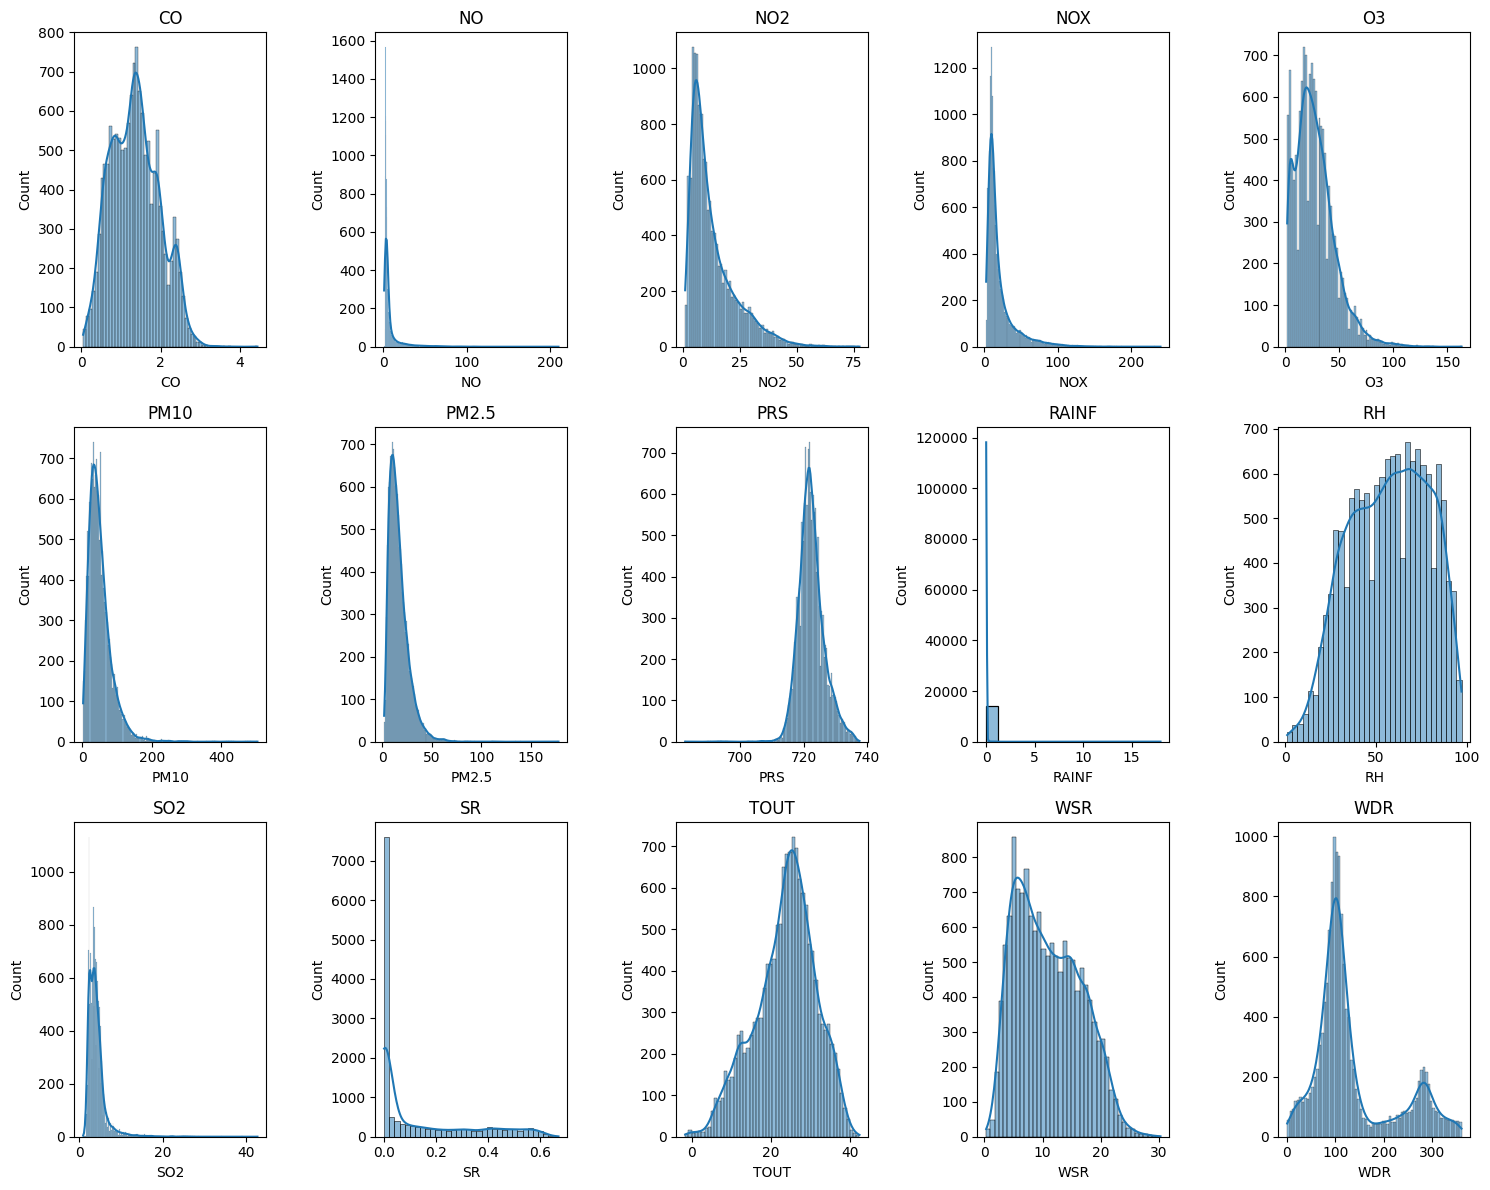

In [22]:
# LLamamos a la funcion para graficar histogramas
graficar_histogramas(database_num)

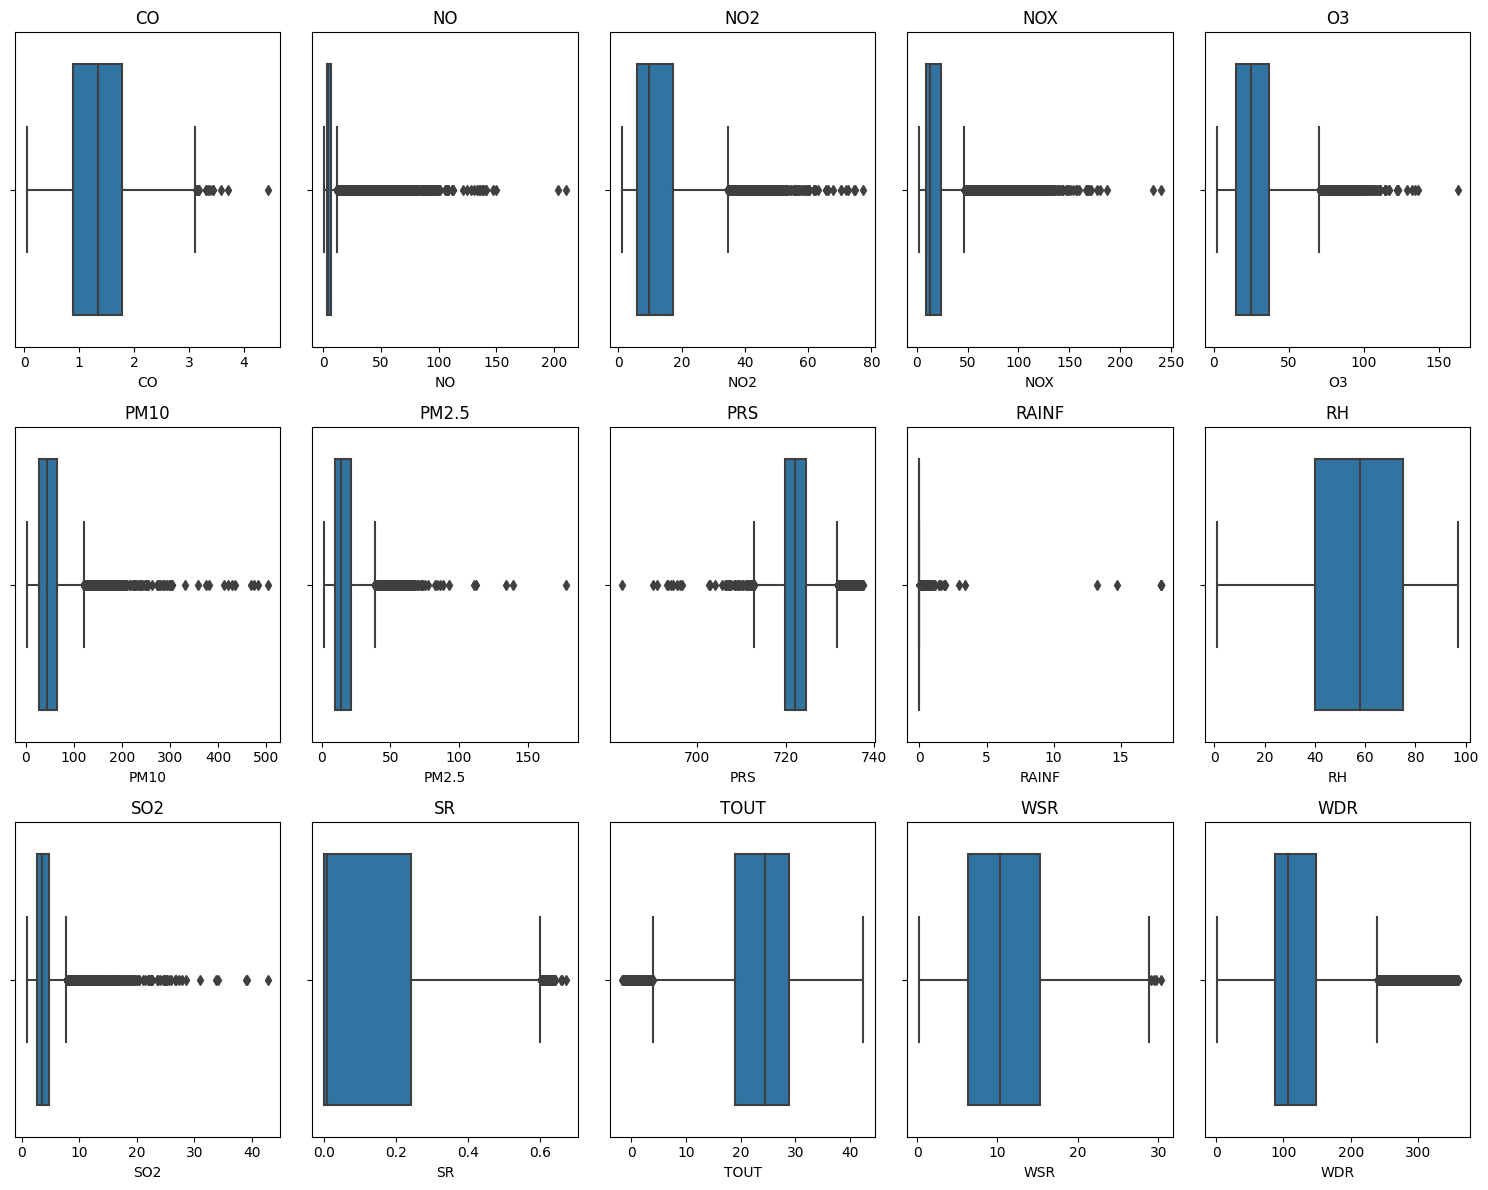

In [23]:
# Graficamos los boxplots
graficar_boxplots(database_num)

In [24]:
# Correlacion entre variables
database_num_corr = database_num.corr()
database_num_corr.style.background_gradient(cmap = 'Blues')

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR
CO,1.000000,0.219342,0.147087,0.209907,-0.011429,0.244647,0.313615,-0.243954,-0.004278,-0.025514,0.331402,0.104858,0.172570,0.089640,-0.025823
NO,0.219342,1.000000,0.604382,0.922903,-0.373345,0.234711,0.296186,0.027943,-0.012455,0.115997,0.081498,-0.052291,-0.261708,-0.365363,0.371820
NO2,0.147087,0.604382,1.000000,0.865071,-0.315817,0.339656,0.423463,0.049113,-0.006272,-0.007463,0.191384,-0.048000,-0.329570,-0.562668,0.401447
NOX,0.209907,0.922903,0.865071,1.000000,-0.386668,0.312724,0.391437,0.042260,-0.010789,0.067221,0.144916,-0.054423,-0.323796,-0.501487,0.429085
O3,-0.011429,-0.373345,-0.315817,-0.386668,1.000000,0.258251,0.116501,-0.164013,-0.018187,-0.553602,0.258427,0.568108,0.478027,0.463459,-0.294463
PM10,0.244647,0.234711,0.339656,0.312724,0.258251,1.000000,0.616743,-0.223528,-0.035653,-0.362521,0.292808,0.340721,0.179997,0.062903,0.069143
PM2.5,0.313615,0.296186,0.423463,0.391437,0.116501,0.616743,1.000000,-0.195992,-0.053596,-0.003434,0.259184,0.280954,0.044457,-0.083383,0.041519
PRS,-0.243954,0.027943,0.049113,0.042260,-0.164013,-0.223528,-0.195992,1.000000,0.000356,0.126978,-0.040819,-0.050108,-0.607023,-0.197537,-0.009717
RAINF,-0.004278,-0.012455,-0.006272,-0.010789,-0.018187,-0.035653,-0.053596,0.000356,1.000000,0.045004,-0.024256,-0.022511,-0.002713,-0.020052,0.008747
RH,-0.025514,0.115997,-0.007463,0.067221,-0.553602,-0.362521,-0.003434,0.126978,0.045004,1.000000,-0.280557,-0.382570,-0.446394,-0.345946,0.013712


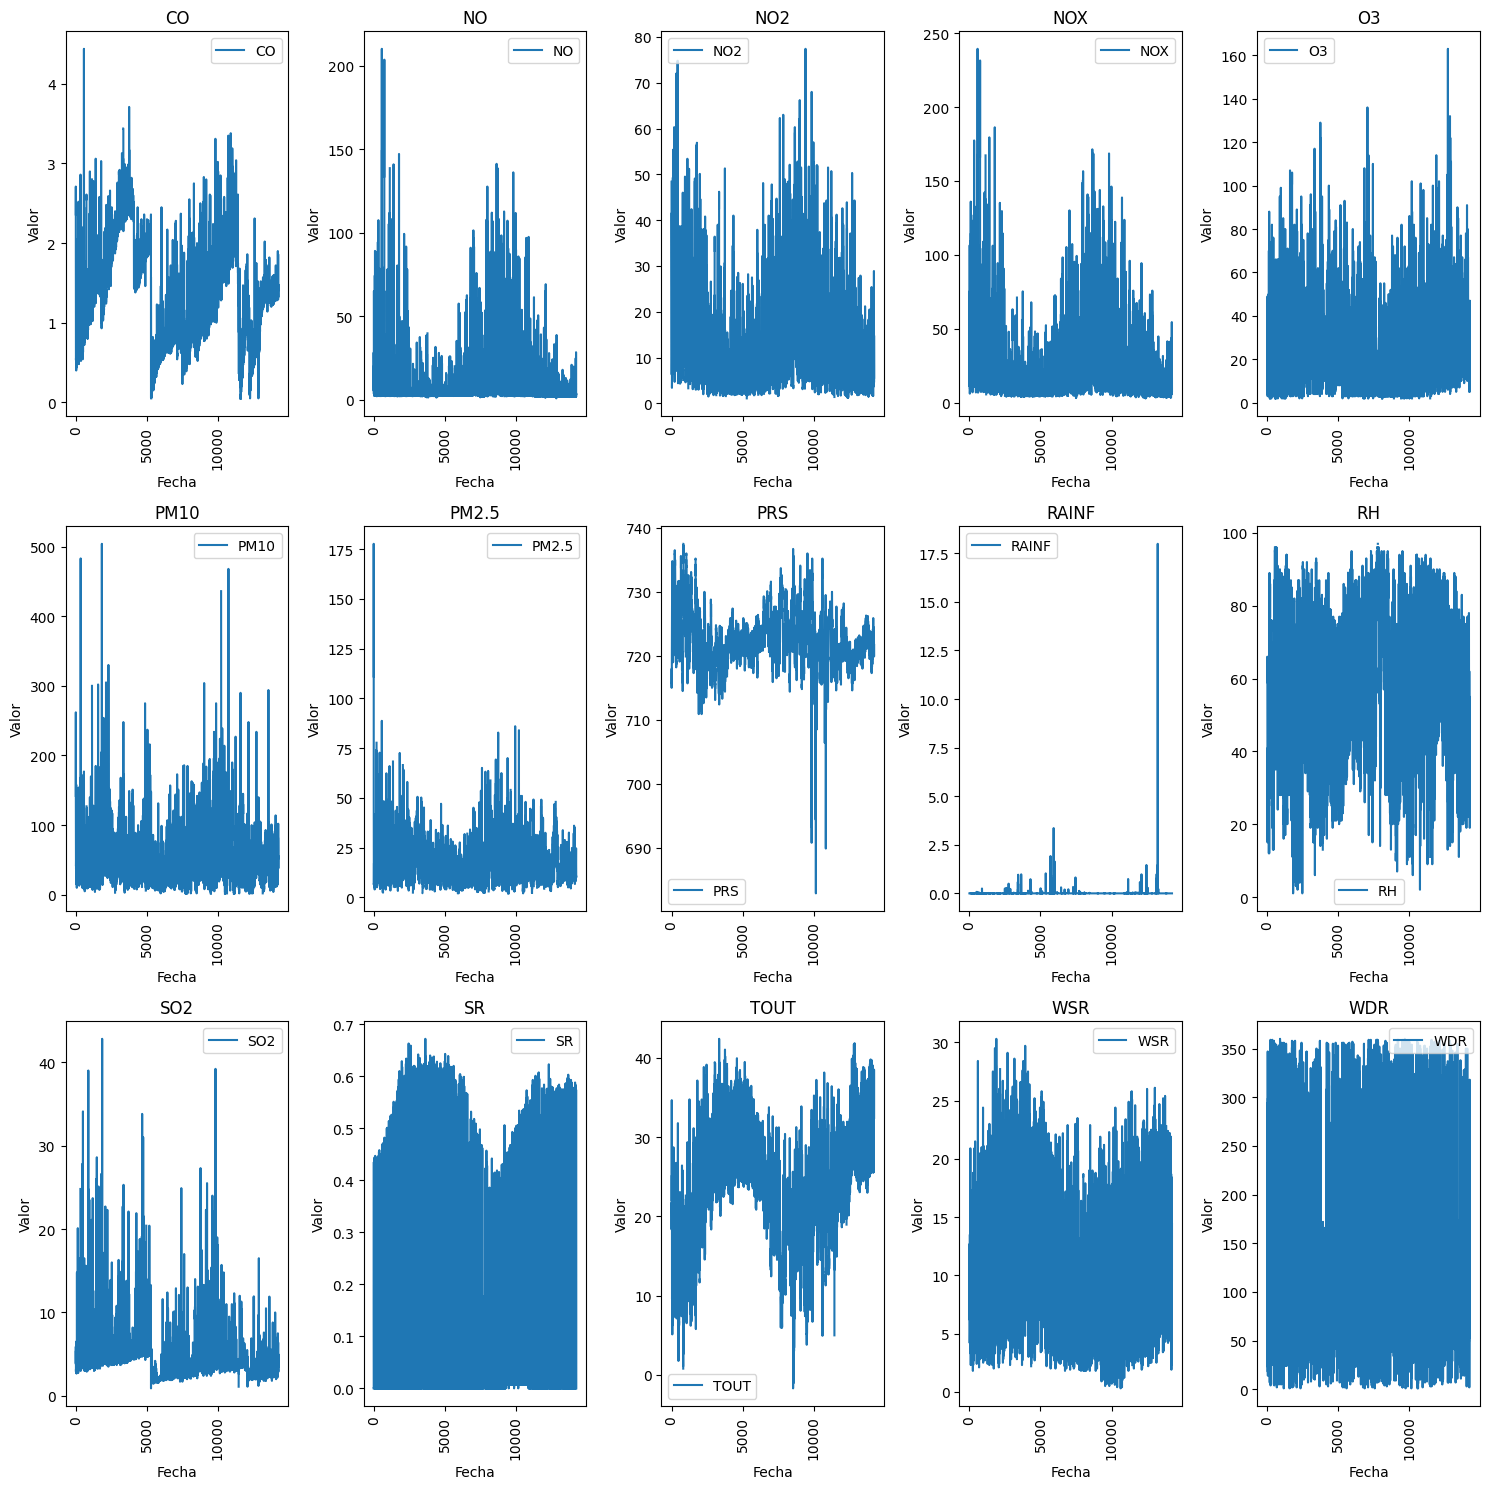

In [25]:
# Graficamos las series de tiempo
# Convertimos la columna en tipo de dato datetime
plot_time_series(database)

## **Limpieza**

In [26]:
# Revisamos los valores faltantes
database.isna().sum()

date        0
CO        169
NO        546
NO2       417
NOX       421
O3        325
PM10      263
PM2.5    1385
PRS       112
RAINF     117
RH        140
SO2       833
SR         22
TOUT      108
WSR       109
WDR       114
dtype: int64

In [27]:
# Eliminamos las filas con valores faltantes
database.dropna(inplace=True)
database.isna().sum()

date     0
CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64

In [28]:
# Revisamos los valores duplicados
database.duplicated().sum()

0

In [29]:
# Eliminamos las filas duplicadas
database.drop_duplicates(inplace=True)
database.duplicated().sum()

0

In [30]:
database.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11452 entries, 0 to 14254
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    11452 non-null  object 
 1   CO      11452 non-null  float64
 2   NO      11452 non-null  float64
 3   NO2     11452 non-null  float64
 4   NOX     11452 non-null  float64
 5   O3      11452 non-null  float64
 6   PM10    11452 non-null  float64
 7   PM2.5   11452 non-null  float64
 8   PRS     11452 non-null  float64
 9   RAINF   11452 non-null  float64
 10  RH      11452 non-null  float64
 11  SO2     11452 non-null  float64
 12  SR      11452 non-null  float64
 13  TOUT    11452 non-null  float64
 14  WSR     11452 non-null  float64
 15  WDR     11452 non-null  float64
dtypes: float64(15), object(1)
memory usage: 1.5+ MB


In [31]:
# Calculamos los valores atipicos con la distancia de mahalanobis
outliers = robust_mahalanobis_outliers(database.select_dtypes(include=["float64"]))
np.sum(outliers)

767

In [32]:
# Eliminamos las filas con valores atipicos
database = database[~outliers]
database.shape

(10685, 16)

## **Calulamos el IMECA**

In [33]:
database_imeca=calcular_imeca(database)
database = class_imeca(database_imeca)
database

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,IndiceIMECA,IMECA
0,2.36,19.8,48.4,68.0,5.0,142.0,111.00,715.7,0.0,59.0,4.0,0.00,21.65,6.5,285.0,339.698978,Peligroso-Aviso
1,2.29,10.8,44.5,55.1,6.0,168.0,112.16,715.5,0.0,59.0,4.6,0.00,21.21,7.1,284.0,348.774616,Peligroso-Aviso
2,2.71,28.3,47.1,75.2,4.0,203.0,139.31,715.4,0.0,62.0,5.9,0.00,21.21,7.7,290.0,391.259931,Peligroso-Aviso
3,2.31,19.6,42.1,61.5,5.0,262.0,177.68,715.1,0.0,59.0,5.5,0.00,20.44,8.2,294.0,445.123769,Peligroso-Emergencia
4,1.85,13.0,39.5,52.5,4.0,185.0,134.21,715.1,0.0,59.0,4.9,0.00,19.80,8.1,287.0,367.779611,Peligroso-Aviso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14249,1.38,3.4,6.5,9.8,43.0,40.0,13.75,719.9,0.0,20.0,5.0,0.17,38.51,15.0,86.0,154.364117,Malo para la salud
14250,1.43,3.4,7.9,11.3,38.0,45.0,11.13,719.9,0.0,21.0,4.0,0.05,37.57,16.6,89.0,150.717388,Malo para la salud
14252,1.47,3.2,14.4,17.4,27.0,49.0,10.71,720.6,0.0,24.0,2.9,0.00,35.51,9.5,115.0,149.326573,Malo para la salud
14253,1.42,3.0,10.3,13.3,29.0,38.0,10.01,721.2,0.0,31.0,3.5,0.00,34.44,14.3,119.0,130.955281,Malo para la salud


In [34]:
# Ejemplo de uso
database_robust_scaled = robust_scaling(database.iloc[:, 0:15])
database_robust_scaled['IndiceIMECA'] = database['IndiceIMECA']
database_robust_scaled['IMECA'] = database['IMECA']
database_robust_scaled

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,IndiceIMECA,IMECA
0,1.174419,5.00000,3.616822,3.949275,-0.956522,2.742857,8.667565,-1.312500,0.0,0.121212,0.10,-0.074074,-0.345880,-0.483146,3.442308,339.698978,Peligroso-Aviso
1,1.093023,2.18750,3.252336,3.014493,-0.913043,3.485714,8.771788,-1.354167,0.0,0.121212,0.40,-0.074074,-0.390641,-0.415730,3.423077,348.774616,Peligroso-Aviso
2,1.581395,7.65625,3.495327,4.471014,-1.000000,4.485714,11.211141,-1.375000,0.0,0.212121,1.05,-0.074074,-0.390641,-0.348315,3.538462,391.259931,Peligroso-Aviso
3,1.116279,4.93750,3.028037,3.478261,-0.956522,6.171429,14.658580,-1.437500,0.0,0.121212,0.85,-0.074074,-0.468973,-0.292135,3.615385,445.123769,Peligroso-Emergencia
4,0.581395,2.87500,2.785047,2.826087,-1.000000,3.971429,10.752920,-1.437500,0.0,0.121212,0.55,-0.074074,-0.534079,-0.303371,3.480769,367.779611,Peligroso-Aviso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,0.034884,-0.12500,-0.299065,-0.268116,0.695652,-0.171429,-0.070081,-0.437500,0.0,-1.060606,0.60,0.498316,1.369278,0.471910,-0.384615,141.541590,Malo para la salud
10681,0.093023,-0.12500,-0.168224,-0.159420,0.478261,-0.028571,-0.305481,-0.437500,0.0,-1.030303,0.10,0.094276,1.273652,0.651685,-0.326923,144.650711,Malo para la salud
10682,0.139535,-0.18750,0.439252,0.282609,0.000000,0.085714,-0.343217,-0.291667,0.0,-0.939394,-0.45,-0.074074,1.064090,-0.146067,0.173077,131.831369,Malo para la salud
10683,0.081395,-0.25000,0.056075,-0.014493,0.086957,-0.228571,-0.406110,-0.166667,0.0,-0.727273,-0.15,-0.074074,0.955239,0.393258,0.250000,138.255780,Malo para la salud


**Analisis Discriminante**

IMECA
Malo para la salud      6595
Peligroso-Alerta        2364
Satisfactorio           1549
Peligroso-Aviso          141
Bueno                     25
Peligroso-Emergencia       9
Daño significativo         2
Name: count, dtype: int64


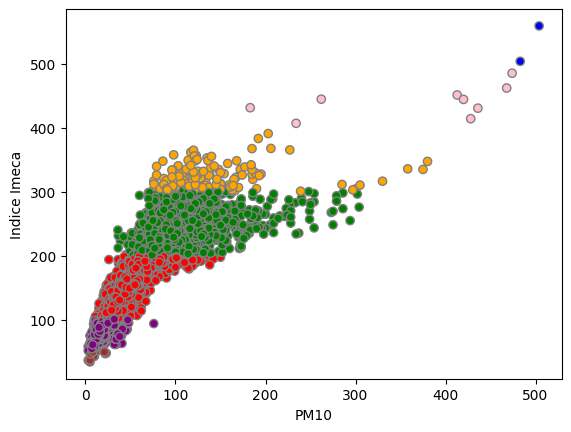

LinearDiscriminantAnalysis()


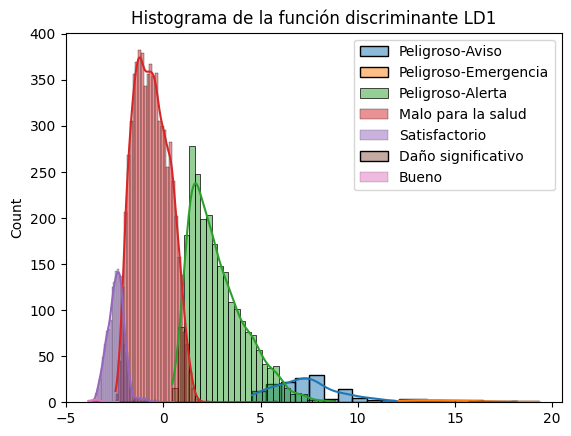

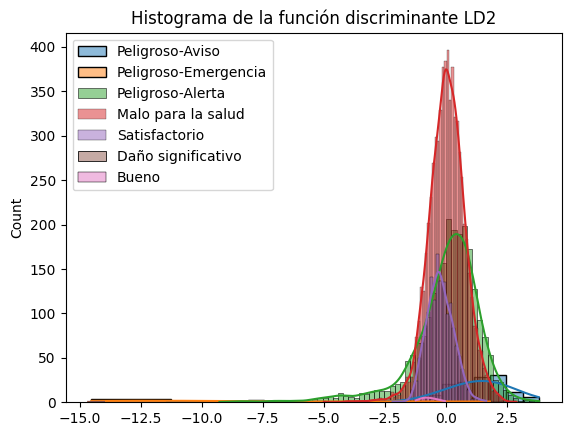

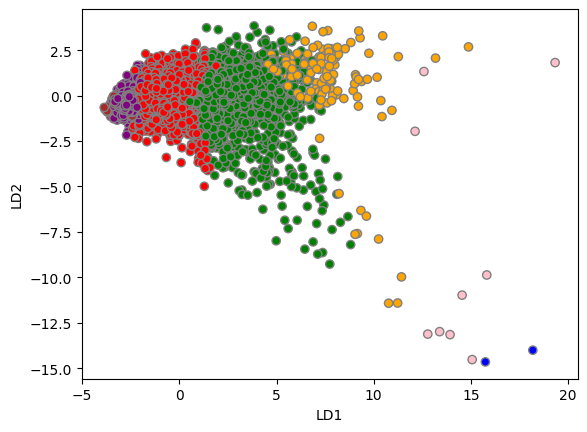

IMECA                 Bueno  Daño significativo  Malo para la salud  \
row_0                                                                 
Daño significativo        0                   2                   0   
Malo para la salud        1                   0                6475   
Peligroso-Alerta          0                   0                  42   
Peligroso-Aviso           0                   0                   1   
Peligroso-Emergencia      0                   0                   0   
Satisfactorio            24                   0                  77   

IMECA                 Peligroso-Alerta  Peligroso-Aviso  Peligroso-Emergencia  \
row_0                                                                           
Daño significativo                   0                0                     4   
Malo para la salud                 336                0                     0   
Peligroso-Alerta                  1952                7                     0   
Peligroso-Aviso           

In [35]:
discriminant_analysis(database)

**Analsis Factorial**

In [36]:
print(database_robust_scaled.iloc[:,0:15].isnull().sum())  # Verificar valores faltantes
print(database_robust_scaled.iloc[:,0:15].var())  # Verificar varianza de cada columna

CO       0
NO       0
NO2      0
NOX      0
O3       0
PM10     0
PM2.5    0
PRS      0
RAINF    0
RH       0
SO2      0
SR       0
TOUT     0
WSR      0
WDR      0
dtype: int64
CO       0.464334
NO       3.502683
NO2      0.772785
NOX      1.072153
O3       0.620833
PM10     1.019592
PM2.5    0.784397
PRS      0.762975
RAINF    0.000000
RH       0.394072
SO2      1.403304
SR       0.439555
TOUT     0.595386
WSR      0.381460
WDR      2.345532
dtype: float64


c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


KMO: 0.6368100465187104
Test de Bartlett: chi-square = 166467.01530030314, p-value = 0.0


 PCA :

[[ 0.02718125  0.17794633  0.04274215  0.00399595 -0.27985149]
 [ 0.73773299  0.10328355 -0.27572007 -0.12308326 -0.27790288]
 [ 0.30884284  0.06634092 -0.01288111  0.04351503  0.17046509]
 [ 0.40997343  0.07529985 -0.07366671  0.00509442  0.06755094]
 [-0.14182234  0.27642886  0.17632009 -0.00587434  0.13379139]
 [ 0.10305705  0.40913385  0.22971676 -0.24272929  0.49305716]
 [ 0.127805    0.33322133  0.07352374 -0.17730133  0.29359661]
 [ 0.03289066 -0.14873154 -0.24427445  0.45718064  0.47683321]
 [ 0.03327142 -0.15534689 -0.18101097 -0.01194472 -0.07318343]
 [ 0.05535185  0.46831142  0.22663589  0.75142669 -0.28050097]
 [-0.01152808  0.23731741  0.05317032 -0.06320237  0.07750395]
 [-0.10485293  0.19523602  0.209358   -0.32551015 -0.36450403]
 [-0.13944708  0.11699069  0.06903722 -0.06705908 -0.10895224]
 [ 0.32962938 -0.46804248  0.79502939  0.06542208  0.03847103]]


 Unrotated FA :


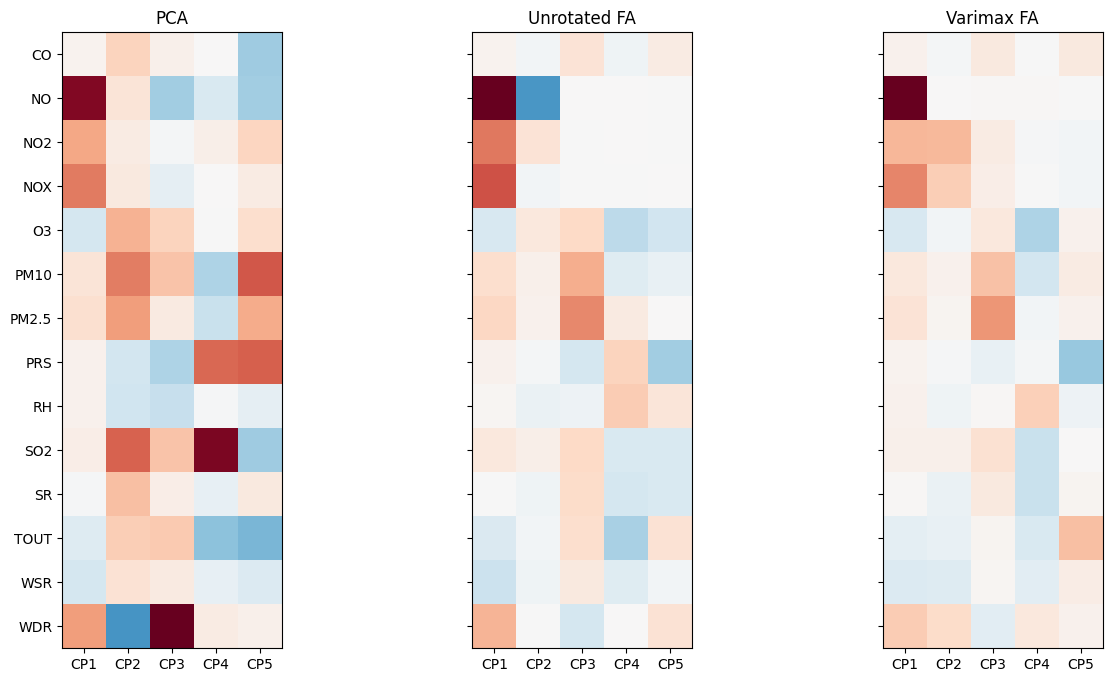

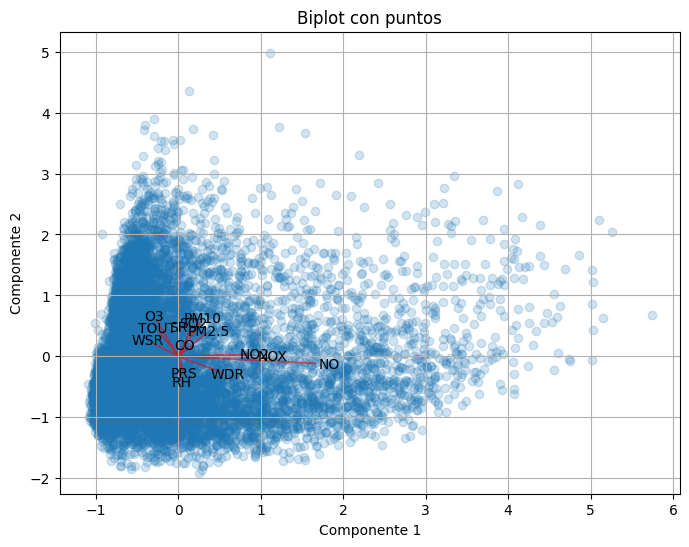

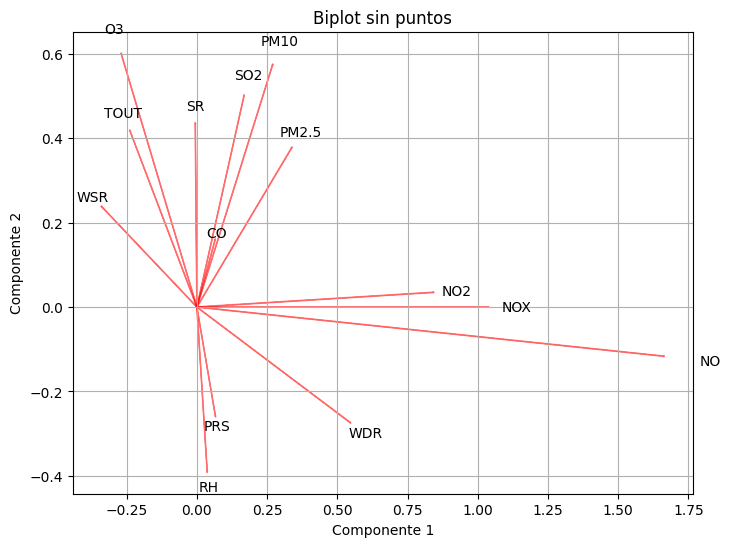

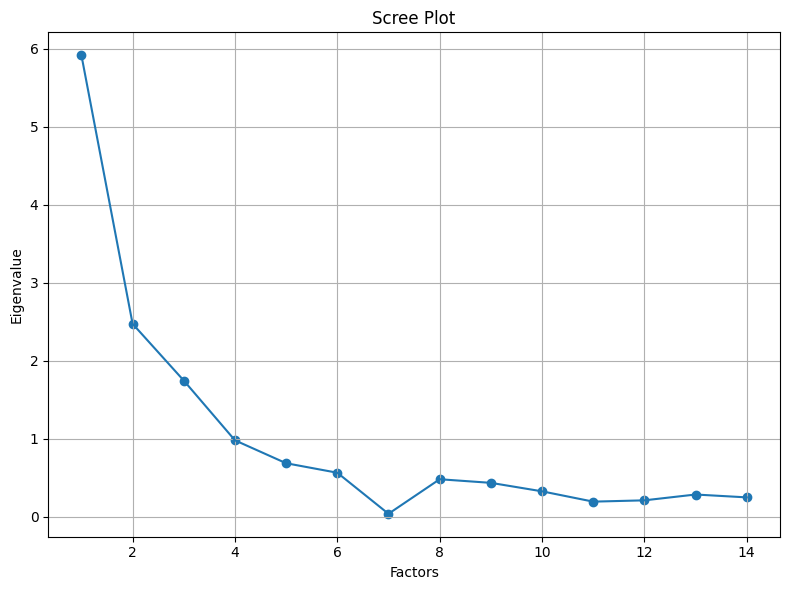

In [37]:
# Ejemplo de uso
factor_analysis(database_robust_scaled.drop(columns='RAINF').iloc[:,0:14], n_components=5)

**Regresión Multiple**

In [38]:
database_robust_scaled.isnull().sum()

CO                0
NO                0
NO2               0
NOX               0
O3                0
PM10              0
PM2.5             0
PRS               0
RAINF             0
RH                0
SO2               0
SR                0
TOUT              0
WSR               0
WDR               0
IndiceIMECA    2431
IMECA          2431
dtype: int64

In [39]:
database_robust_scaled.iloc[:,15]

0        339.698978
1        348.774616
2        391.259931
3        445.123769
4        367.779611
            ...    
10680    141.541590
10681    144.650711
10682    131.831369
10683    138.255780
10684    126.690476
Name: IndiceIMECA, Length: 10685, dtype: float64

In [40]:
database_robust_scaled.iloc[:,0:8]

,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS
0,1.174419,5.00000,3.616822,3.949275,-0.956522,2.742857,8.667565,-1.312500
1,1.093023,2.18750,3.252336,3.014493,-0.913043,3.485714,8.771788,-1.354167
2,1.581395,7.65625,3.495327,4.471014,-1.000000,4.485714,11.211141,-1.375000
3,1.116279,4.93750,3.028037,3.478261,-0.956522,6.171429,14.658580,-1.437500
4,0.581395,2.87500,2.785047,2.826087,-1.000000,3.971429,10.752920,-1.437500
...,...,...,...,...,...,...,...,...
10680,0.034884,-0.12500,-0.299065,-0.268116,0.695652,-0.171429,-0.070081,-0.437500
10681,0.093023,-0.12500,-0.168224,-0.159420,0.478261,-0.028571,-0.305481,-0.437500
10682,0.139535,-0.18750,0.439252,0.282609,0.000000,0.085714,-0.343217,-0.291667
10683,0.081395,-0.25000,0.056075,-0.014493,0.086957,-0.228571,-0.406110,-0.166667


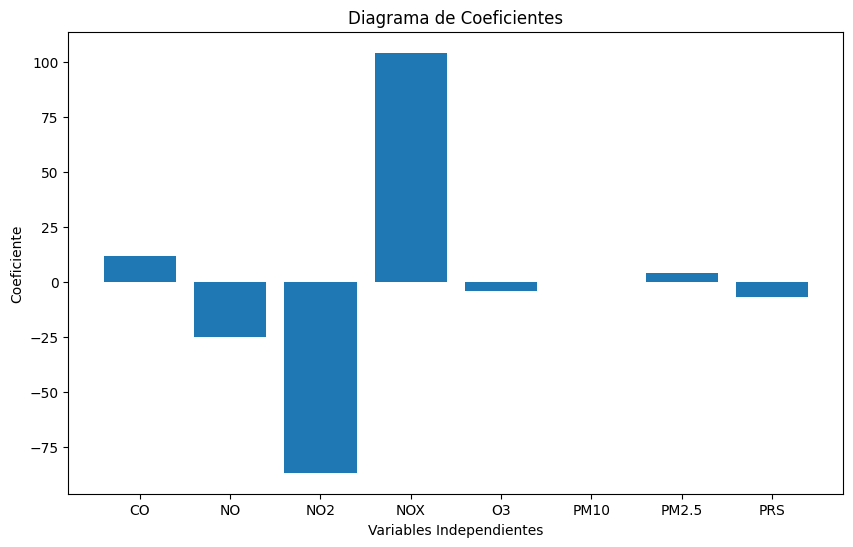

(array([ 1.18667716e+01, -2.49037693e+01, -8.68511613e+01,  1.04271439e+02,
        -4.30415142e+00, -5.68154302e-02,  3.85034628e+00, -6.67435690e+00]),
 0.04932169672491271,
             CO       NO       NO2       NOX        O3       PM10     PM2.5  \
 8395  0.523256 -0.21875  0.906542  0.652174 -0.347826  -0.142857  0.940701   
 8269  0.569767 -0.25000  0.205607  0.108696 -0.521739   0.085714  0.042228   
 1068  0.418605  0.84375  0.476636  0.557971 -0.826087   0.028571  2.441150   
 7862 -0.081395 -0.28125 -0.383178 -0.355072  0.217391  11.142857  1.300090   
 4013  0.674419 -0.15625 -0.495327 -0.413043  0.739130   3.971429 -0.110512   
 ...        ...      ...       ...       ...       ...        ...       ...   
 3258  0.209302  0.06250 -0.504673 -0.376812  0.347826  -0.028571 -0.346810   
 4573 -1.023256  0.53125 -0.102804  0.043478  0.260870   0.285714  0.185984   
 9715 -0.511628  0.56250  0.551402  0.550725  0.695652   0.342857  0.951482   
 6677 -0.406977  0.65625  1.336449

In [41]:
database_robust_scaled = database_robust_scaled.dropna()
RLM(database_robust_scaled)

c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\isaac\AppData\Local\Temp\ipykernel_16184\414963568.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["Prediccion"]=model_kmeans.labels_


,CO,NO,NO2,NOX,O3,PM10,PM2.5,PRS,RAINF,RH,SO2,SR,TOUT,WSR,WDR,IndiceIMECA,IMECA,Prediccion
0,1.174419,5.00000,3.616822,3.949275,-0.956522,2.742857,8.667565,-1.312500,0.0,0.121212,0.10,-0.074074,-0.345880,-0.483146,3.442308,339.698978,Peligroso-Aviso,6
1,1.093023,2.18750,3.252336,3.014493,-0.913043,3.485714,8.771788,-1.354167,0.0,0.121212,0.40,-0.074074,-0.390641,-0.415730,3.423077,348.774616,Peligroso-Aviso,6
2,1.581395,7.65625,3.495327,4.471014,-1.000000,4.485714,11.211141,-1.375000,0.0,0.212121,1.05,-0.074074,-0.390641,-0.348315,3.538462,391.259931,Peligroso-Aviso,6
3,1.116279,4.93750,3.028037,3.478261,-0.956522,6.171429,14.658580,-1.437500,0.0,0.121212,0.85,-0.074074,-0.468973,-0.292135,3.615385,445.123769,Peligroso-Emergencia,6
4,0.581395,2.87500,2.785047,2.826087,-1.000000,3.971429,10.752920,-1.437500,0.0,0.121212,0.55,-0.074074,-0.534079,-0.303371,3.480769,367.779611,Peligroso-Aviso,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10680,0.034884,-0.12500,-0.299065,-0.268116,0.695652,-0.171429,-0.070081,-0.437500,0.0,-1.060606,0.60,0.498316,1.369278,0.471910,-0.384615,141.541590,Malo para la salud,4
10681,0.093023,-0.12500,-0.168224,-0.159420,0.478261,-0.028571,-0.305481,-0.437500,0.0,-1.030303,0.10,0.094276,1.273652,0.651685,-0.326923,144.650711,Malo para la salud,4
10682,0.139535,-0.18750,0.439252,0.282609,0.000000,0.085714,-0.343217,-0.291667,0.0,-0.939394,-0.45,-0.074074,1.064090,-0.146067,0.173077,131.831369,Malo para la salud,4
10683,0.081395,-0.25000,0.056075,-0.014493,0.086957,-0.228571,-0.406110,-0.166667,0.0,-0.727273,-0.15,-0.074074,0.955239,0.393258,0.250000,138.255780,Malo para la salud,4


c:\Users\isaac\OneDrive\DocumentsTEC\5.0 Semestre\Aplicacion de Metodo Multivariados en Ciencia de Datos\RETO\venv\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1500 with 0 Axes>

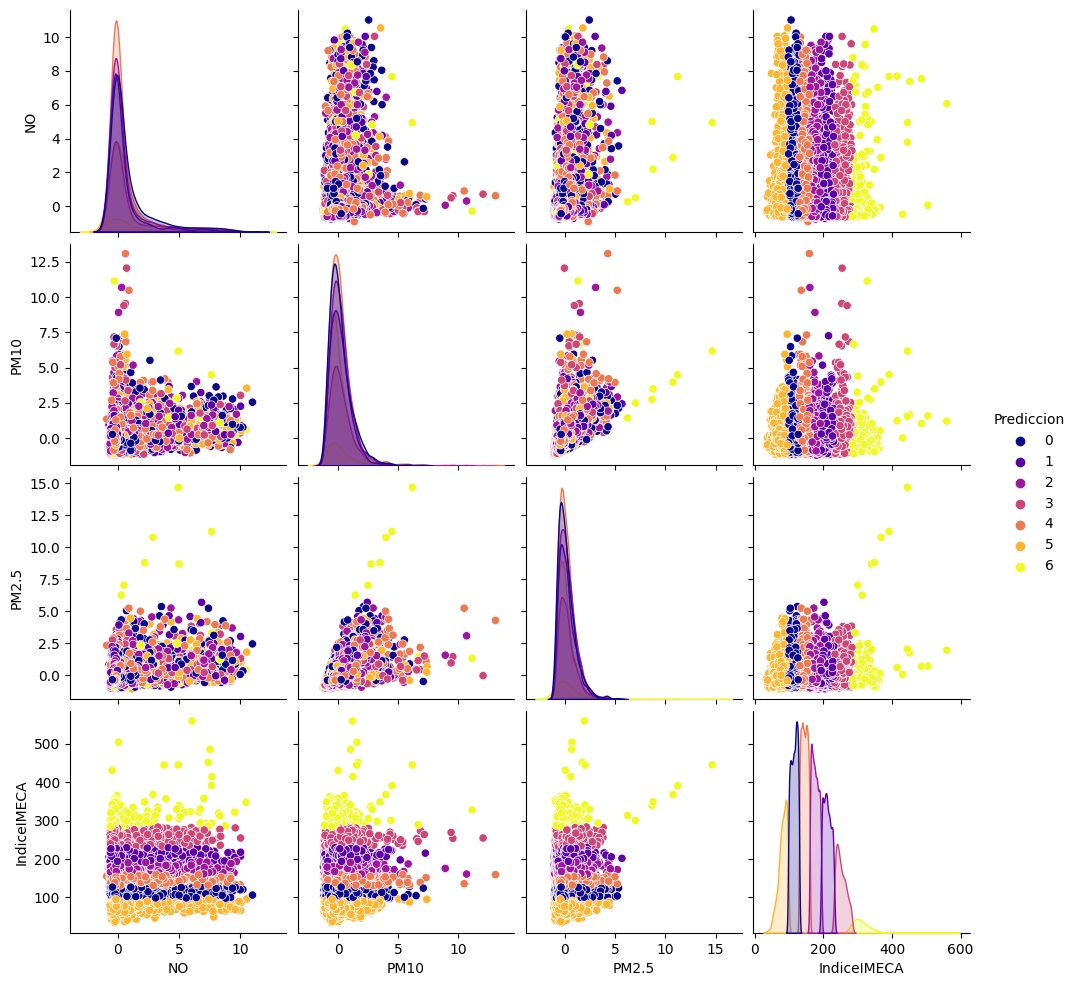

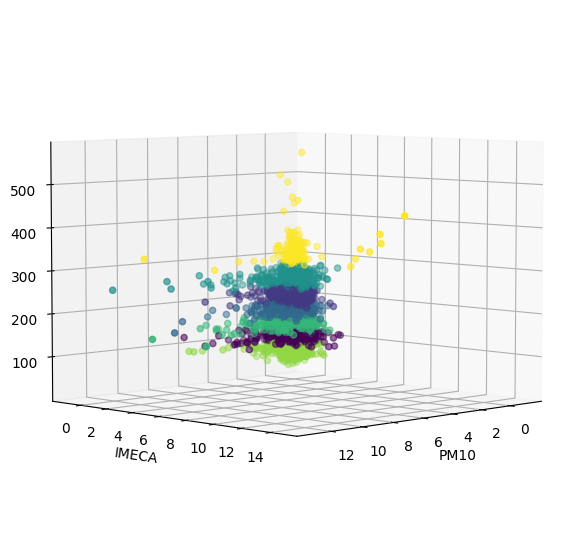

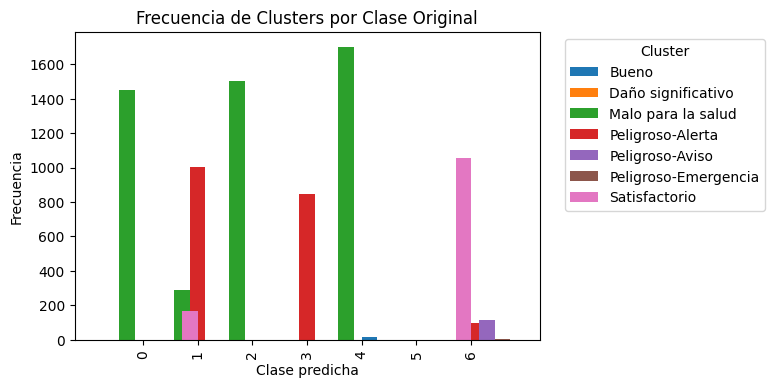

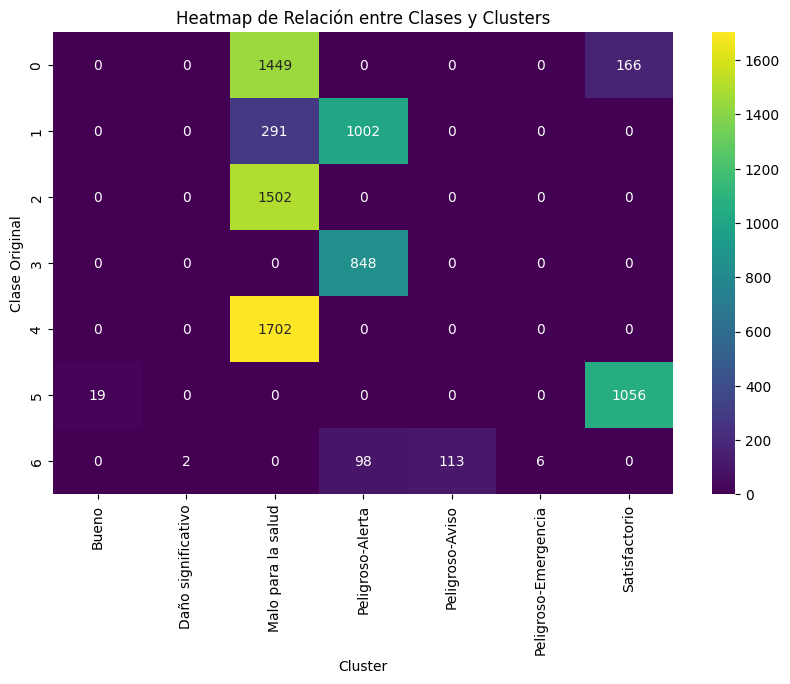

C:\Users\isaac\AppData\Local\Temp\ipykernel_16184\414963568.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["IMECA"]=datos['IMECA'].replace(dict_clases)


'Silhouette: 0.38487713456200434 - Calinski-Harabasz: 5876.998232367204'

In [42]:
clustering(database_robust_scaled)

In [43]:
database_robust_scaled.to_csv('tecnl_imeca.csv')